# OOP Polynomial Linear Regression Implementation

This Jupyter Notebook provides a basic implementation of Polynomial Linear Regression. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects wing size given the other measurements we have.

#### Step 1 - Import Dependencies

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error 

#### Step 2 - Import And Visualise The Data

In [2]:
#Import data as a Pandas DataFrame
insects = pd.read_csv('data/insects.csv', sep='\t')
insects = pd.DataFrame({
    'continent': insects['continent'],
    'latitude': insects['latitude'],
    'sex': insects['sex'],
    'wingsize': insects['wingsize']
})

# Features variable
X_insects = insects[['continent', 'latitude', 'sex']]
# Target variable
y_insects = insects['wingsize']

insects.head()

,continent,latitude,sex,wingsize
0,1,35.5,0,901
1,1,37.0,0,896
2,1,38.6,0,906
3,1,40.7,0,907
4,1,40.9,0,898


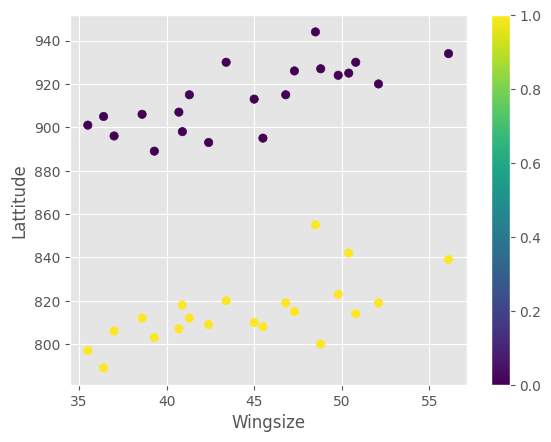

In [3]:
# Plot the data, colour coded by sex
ax = plt.scatter(insects.latitude, insects.wingsize, c=insects['sex'])
plt.xlabel("Wingsize")
plt.ylabel("Lattitude")
plt.colorbar()
plt.show()

#### Step 3: Instantiate a LinearRegression Object

In [4]:
insects_regression = LinearRegression()

#### Step 4: Fit the model

In [5]:
# Instantiate a polynomial feature with 4 degrees
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the features
poly_features = poly.fit_transform(X_insects)

# Fit the regression model
insects_regression.fit(poly_features, y_insects)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


#### Step 5: Predict Values

In [6]:
# Predict the target for the whole dataset
wing_size_predictions = insects_regression.predict(poly_features)

#Predict the target for a new data point
new_insect = pd.DataFrame({
    'continent': [1],
    'latitude': [40],
    'sex': [0]
})
new_poly_features = poly.fit_transform(new_insect)
new_insect['wingsize'] = insects_regression.predict(new_poly_features)
print(f"New insect is:\n{new_insect}")

New insect is:
   continent  latitude  sex    wingsize
0          1        40    0  905.617061


#### Step 5: Plot the Predictions

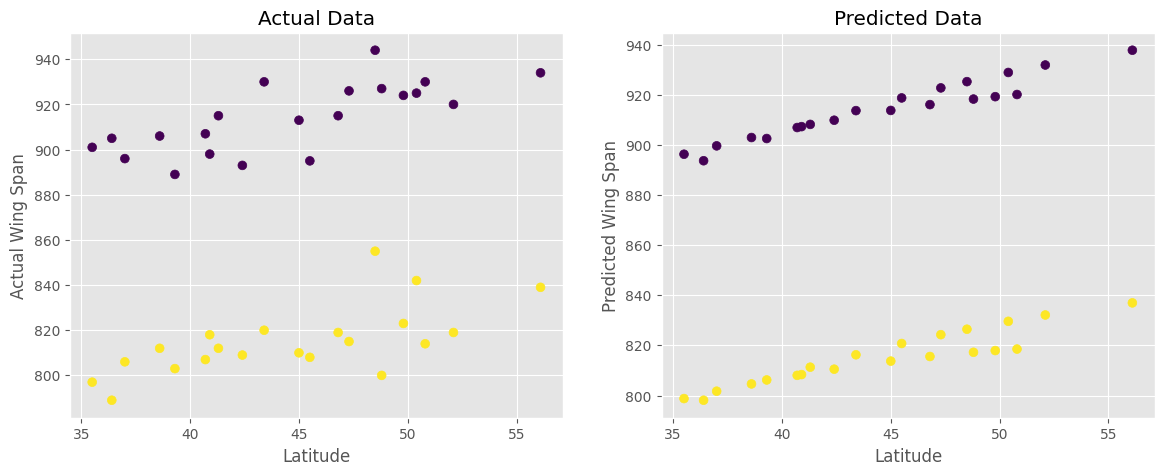

In [7]:
#Plot the predictions compared to the actual data
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(insects.latitude, insects.wingsize, c=insects['sex'],  s=40)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Actual Wing Span")


axs[1].scatter(insects.latitude, wing_size_predictions, c=insects['sex'], s=40)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Predicted Wing Span")

plt.show()

#### Step 6: Evaluate The Model

In [8]:
#Get Evalutative Data from the model
mae = mean_absolute_error(y_true=y_insects,y_pred=wing_size_predictions) 
mse = mean_squared_error(y_true=y_insects,y_pred=wing_size_predictions)
print("MAE:",mae) 
print("MSE:",mse) 
print()

#Manually calculate the loss and cost of the model
table = pd.DataFrame({
    'Target': y_insects,
    'Predicted result': wing_size_predictions,
    'Loss': abs(y_insects - insects_regression.predict(poly_features).round(2))
})
cost = (1/table.shape[0]) * (table['Loss'].sum() / table.shape[0])

print(f"The cost of this model is {cost:.5f}")
print(table)

MAE: 7.873550407828994
MSE: 104.23361746754385

The cost of this model is 0.18747
    Target  Predicted result   Loss
0      901        896.245831   4.75
1      896        899.588446   3.59
2      906        902.912656   3.09
3      907        906.897765   0.10
4      898        907.254926   9.25
5      893        909.809604  16.81
6      913        913.719231   0.72
7      915        916.040682   1.04
8      927        918.250422   8.75
9      924        919.209379   4.79
10     930        920.071059   9.93
11     905        893.652827  11.35
12     889        902.511650  13.51
13     915        908.144529   6.86
14     930        913.640279  16.36
15     895        918.707041  23.71
16     926        922.708541   3.29
17     944        925.201110  18.80
18     925        928.861200   3.86
19     920        931.838353  11.84
20     934        937.734469   3.73
21     797        798.779566   1.78
22     806        801.722337   4.28
23     812        804.620047   7.38
24     807        